# ZPEM2311 Major Project Download and Fit Example
This short example shows you how your `model.py` module should work and how to download COVID-19 data from the [Open COVID-19 Dataset](https://github.com/open-covid-19/data).

You should also look in the [examples folder](https://github.com/open-covid-19/data/tree/main/examples) of that repo for more examples of how to work with the data.

So first import some libraries, including your custom `model` library.

In [1]:
import pandas
from model import fit, predict
from plotly import graph_objs as go

## Download from the Open COVID-19 Dataset
In this example I will download Australian data.

In [2]:
data = pandas.read_csv('https://storage.googleapis.com/covid19-open-data/v2/AU/main.csv')

Now split the data into what you're trying to predict and what you're using to predict it. We're trying to predict the "total_confirmed" column in that DataFrame, primarily based on the "date" column, but you are welcome to recruit any other data that might be useful.

The data we're trying to predict goes in `y`, and the data that we're using to make the predictions goes in `X`.

When I say "any", I mean except these columns, because they would make it too easy:
"new_confirmed", "new_deceased", "new_recovered", "total_confirmed", "total_deceased", "total_recovered", "new_hospitalized", "total_hospitalized", "current_hospitalized", "new_intensive_care", "total_intensive_care", "current_intensive_care", "new_ventilator", "total_ventilator", and "current_ventilator".

So let's remove them while we're here.

In [3]:
y = data['total_confirmed']

X = data.drop(columns=[
    "new_confirmed", "new_deceased", "new_recovered", 
    "total_confirmed", "total_deceased", "total_recovered",
    "new_hospitalized", "total_hospitalized", "current_hospitalized",
    "new_intensive_care", "total_intensive_care", 
    "current_intensive_care", "new_ventilator", "total_ventilator",
    "current_ventilator"
])

## Fit your model

In [4]:
params = fit(X, y)

## Interpret your parameters
The point of fitting these models is that they have meaning. For your project you should interpret the meaning of the parameters that you discovered. Your parameters will be different to mine.

In [5]:
pandas.DataFrame(dict(value=params))

,value
alpha,0.756565
beta,0.593299
delta,0.492421
gamma,0.597983
m,120.024500
t0,49.148785


## Validate your model
You will need to do more work to validate your model, but just to eyeball the results we will plot it along side the confirmed cases data.

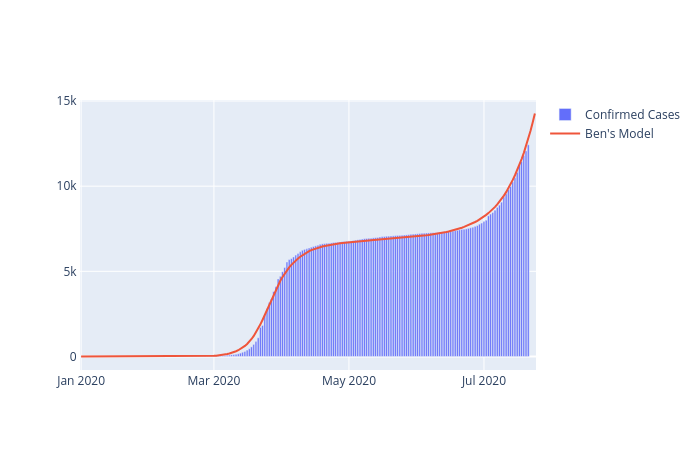

In [6]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['date'],
                     y=y,
                     name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data['date'],
                         y=predict(X, **params),
                         name="Ben's Model"))
fig.show('png')